
Quantile 0.1:
                         QuantReg Regression Results                          
Dep. Variable:                  stock   Pseudo R-squared:               0.3309
Model:                       QuantReg   Bandwidth:                      0.3172
Method:                 Least Squares   Sparsity:                        6.972
Date:                Thu, 17 Jul 2025   No. Observations:                  500
Time:                        21:14:21   Df Residuals:                      498
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8857      0.094     -9.385      0.000      -1.071      -0.700
market         1.2039      0.113     10.669      0.000       0.982       1.426

Quantile 0.5:
                         QuantReg Regression Results                          
Dep. Variable:        

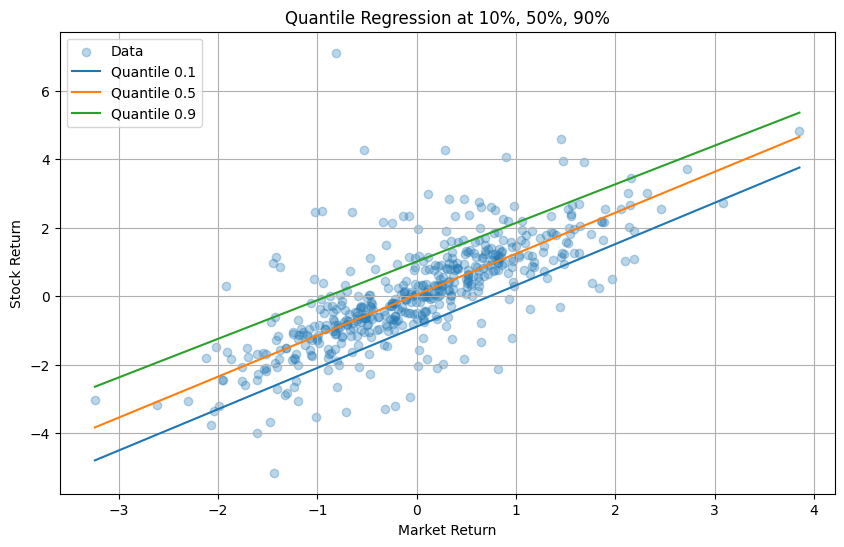

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulated financial data
np.random.seed(42)
n = 500
market_return = np.random.normal(0, 1, n)
idiosyncratic = np.random.standard_t(df=2, size=n) * 0.5  # heavy-tailed
stock_return = 0.02 + 1.2 * market_return + idiosyncratic

# Build DataFrame
df = pd.DataFrame({
    'stock': stock_return,
    'market': market_return
})

# Quantile Regression at different quantiles
quantiles = [0.1, 0.5, 0.9]
models = {}
X = sm.add_constant(df['market'])

for q in quantiles:
    mod = sm.QuantReg(df['stock'], X)
    res = mod.fit(q=q)
    models[q] = res
    print(f"\nQuantile {q}:")
    print(res.summary())

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['market'], df['stock'], alpha=0.3, label='Data')
x_vals = np.linspace(df['market'].min(), df['market'].max(), 100)
for q in quantiles:
    y_vals = models[q].params['const'] + models[q].params['market'] * x_vals
    plt.plot(x_vals, y_vals, label=f'Quantile {q}')
plt.title('Quantile Regression at 10%, 50%, 90%')
plt.xlabel('Market Return')
plt.ylabel('Stock Return')
plt.legend()
plt.grid(True)
plt.show()
